<a href="https://colab.research.google.com/github/Bustagar/APRENDIZAJE-AUTOMATICO-1/blob/main/TP2_AA1_aprendizaje_no_supervisado(Resuelto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

üßë Juan Sebastian Bustamante Garcia

## Indicaciones b√°sicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compa√±ero.

4) copias expl√≠citas de secciones enteras del trabajo de otro ser√° penalizado disminuyendo su puntuaci√≥n.

5) No se olvide de a√±adir las fuentes de inspiraci√≥n de su c√≥digo (blogs, prompts de chatgpt o similar).

6) Adem√°s de todo el c√≥digo que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada secci√≥n. Esto le ayudar√° al momento del coloquio / parcial

7) Revise las fecha l√≠mite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien m√°s en el foro.
  - Puede comentar m√°s de un posteo de sus compa√±eros siempre y cuando el intercambio sea respetuoso y fruct√≠fero.
* Deben postear como soluci√≥n un enlace a su notebook colab p√∫blico y tambi√©n un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su soluci√≥n y explique lo realizado. Duraci√≥n m√°xima: 5 minutos. Puede grabarse a Ud. mismo usando una sesi√≥n de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces err√≥neos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicaci√≥n de clustering y reducci√≥n de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresi√≥n lineal a un dataset de su elecci√≥n, evaluar su rendimiento e identificar las variables m√°s relevantes para la predicci√≥n.

---

# **Instrucciones**:

#1. **Selecci√≥n del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables num√©ricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligi√≥. Continue al siguiente punto.  



## Resoluci√≥n:

## Dataset elegido: https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

## Ausentismo laboral:

## Descripci√≥n de variables

1. Identificaci√≥n individual (ID)
2. Raz√≥n de ausencia (ICD)
Ausencias certificadas por el C√≥digo Internacional de Enfermedades (ICD) estratificadas en 21 categor√≠as (I a XXI) de la siguiente manera:

I. Ciertas enfermedades infecciosas y parasitarias II. Neoplasias III. Enfermedades de la sangre y √≥rganos hematopoy√©ticos, y ciertos trastornos que afectan el sistema inmunol√≥gico IV. Enfermedades endocrinas, nutricionales y metab√≥licas V. Trastornos mentales y del comportamiento VI. Enfermedades del sistema nervioso VII. Enfermedades del ojo y sus anexos VIII. Enfermedades del o√≠do y de la ap√≥fisis mastoidea IX. Enfermedades del sistema circulatorio X. Enfermedades del sistema respiratorio XI. Enfermedades del sistema digestivo XII. Enfermedades de la piel y del tejido subcut√°neo XIII. Enfermedades del sistema musculoesquel√©tico y del tejido conjuntivo XIV. Enfermedades del sistema genitourinario XV. Embarazo, parto y puerperio XVI. Ciertas condiciones originadas en el per√≠odo perinatal XVII. Malformaciones cong√©nitas, deformaciones y anomal√≠as cromos√≥micas XVIII. S√≠ntomas, signos y hallazgos cl√≠nicos y de laboratorio anormales no clasificados en otra parte XIX. Lesiones, envenenamientos y ciertas otras consecuencias de causas externas XX. Causas externas de morbilidad y mortalidad XXI. Factores que influyen en el estado de salud y contacto con los servicios de salud

Y 7 categor√≠as sin seguimiento de pacientes (CID):

Consulta m√©dica (22)

Donaci√≥n de sangre (23)

An√°lisis de laboratorio (24)

Ausencia injustificada (25)

Fisioterapia (26)

Consulta dental (27)

3. Mes de ausencia
4. D√≠a de la semana (Lunes (2), Martes (3), Mi√©rcoles (4), Jueves (5), Viernes (6))
5. Estaciones
6. Gasto en transporte
7. Distancia de la residencia al trabajo (kil√≥metros)
8. Tiempo de servicio
9. Edad
10. Carga laboral promedio/d√≠a
11. Objetivo alcanzado
12. Falla disciplinaria (s√≠=1; no=0)
13. Educaci√≥n (Secundaria (1), Pregrado (2), Posgrado (3), Maestr√≠a y doctorado (4))
14. Hijo/a (n√∫mero de hijos/as)
15. Bebedor social (s√≠=1; no=0)
16. Fumador social (s√≠=1; no=0)
17. Mascota (n√∫mero de mascotas)
18. Peso
19. Altura
20. √çndice de masa corporal
21. Tiempo de ausentismo en horas (variable objetivo)

### Carga del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/Bustagar/APRENDIZAJE-AUTOMATICO-1/refs/heads/main/Absenteeism_at_work.csv"

df = pd.read_csv(url, sep=';')
df.sample(5)


ID  Reason for absence  Month of absence  Day of the week  Seasons  \
181  28                  28                 3                6        3   
451   5                  26                 6                3        3   
89   14                   6                11                6        4   
645   3                  27                 3                6        2   
474  10                  22                 7                6        1   

     Transportation expense  Distance from Residence to Work  Service time  \
181                     225                               26             9   
451                     235                               20            13   
89                      155                               12            14   
645                     179                               51            18   
474                     361                               52             3   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
181   28                 343.253  ...                     0          1    1   
451   43                 253.957  ...                     0          1    1   
89    34                 306.345  ...                     0          1    2   
645   38                 222.196  ...                     0          1    0   
474   28                 230.290  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
181               0              0    2      69     169               24   
451               1              0    0     106     167               38   
89                1              0    0      95     196               25   
645               1              0    0      89     170               31   
474               1              0    4      80     172               27   

     Absenteeism time in hours  
181                          2  
451                          8  
89                           8  
645                          3  
474                          8  

[5 rows x 21 columns]

## Renombramos las columnas para mejor entendimiento

In [3]:
df.rename({
    'ID': 'Id',
    'Reason for absence': 'Raz√≥n de ausencia',
    'Month of absence': 'Mes de ausencia',
    'Day of the week': 'D√≠a de la semana',
    'Seasons': 'Estaciones',
    'Transportation expense': 'Gasto en transporte',
    'Distance from Residence to Work': 'Distancia de la residencia al trabajo',
    'Service time': 'Tiempo de servicio',
    'Age': 'Edad',
    'Work load Average/day ': 'Carga laboral promedio/d√≠a',
    'Hit target': 'Objetivo alcanzado',
    'Disciplinary failure': 'Falla disciplinaria',
    'Education': 'Educaci√≥n',
    'Son': 'Hijo/a',
    'Social drinker': 'Bebedor social',
    'Social smoker': 'Fumador social',
    'Pet': 'Mascota',
    'Weight': 'Peso',
    'Height': 'Altura',
    'Body mass index': '√çndice de masa corporal',
    'Absenteeism time in hours': 'Tiempo de ausentismo en horas'}, axis=1, inplace=True)

In [4]:
df.columns

Index(['Id', 'Raz√≥n de ausencia', 'Mes de ausencia', 'D√≠a de la semana',
       'Estaciones', 'Gasto en transporte',
       'Distancia de la residencia al trabajo', 'Tiempo de servicio', 'Edad',
       'Carga laboral promedio/d√≠a', 'Objetivo alcanzado',
       'Falla disciplinaria', 'Educaci√≥n', 'Hijo/a', 'Bebedor social',
       'Fumador social', 'Mascota', 'Peso', 'Altura',
       '√çndice de masa corporal', 'Tiempo de ausentismo en horas'],
      dtype='object')


## 2. **An√°lisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribuci√≥n, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gr√°ficos de dispersi√≥n (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


### 2.1 Describan las variables (media, distribuci√≥n, outliers).

In [5]:
df.describe()

Id  Raz√≥n de ausencia  Mes de ausencia  D√≠a de la semana  \
count  740.000000         740.000000       740.000000        740.000000   
mean    18.017568          19.216216         6.324324          3.914865   
std     11.021247           8.433406         3.436287          1.421675   
min      1.000000           0.000000         0.000000          2.000000   
25%      9.000000          13.000000         3.000000          3.000000   
50%     18.000000          23.000000         6.000000          4.000000   
75%     28.000000          26.000000         9.000000          5.000000   
max     36.000000          28.000000        12.000000          6.000000   

       Estaciones  Gasto en transporte  Distancia de la residencia al trabajo  \
count  740.000000           740.000000                             740.000000   
mean     2.544595           221.329730                              29.631081   
std      1.111831            66.952223                              14.836788   
min      1.000000           118.000000                               5.000000   
25%      2.000000           179.000000                              16.000000   
50%      3.000000           225.000000                              26.000000   
75%      4.000000           260.000000                              50.000000   
max      4.000000           388.000000                              52.000000   

       Tiempo de servicio        Edad  Carga laboral promedio/d√≠a  ...  \
count          740.000000  740.000000                  740.000000  ...   
mean            12.554054   36.450000                  271.490235  ...   
std              4.384873    6.478772                   39.058116  ...   
min              1.000000   27.000000                  205.917000  ...   
25%              9.000000   31.000000                  244.387000  ...   
50%             13.000000   37.000000                  264.249000  ...   
75%             16.000000   40.000000                  294.217000  ...   
max             29.000000   58.000000                  378.884000  ...   

       Falla disciplinaria   Educaci√≥n      Hijo/a  Bebedor social  \
count           740.000000  740.000000  740.000000      740.000000   
mean              0.054054    1.291892    1.018919        0.567568   
std               0.226277    0.673238    1.098489        0.495749   
min               0.000000    1.000000    0.000000        0.000000   
25%               0.000000    1.000000    0.000000        0.000000   
50%               0.000000    1.000000    1.000000        1.000000   
75%               0.000000    1.000000    2.000000        1.000000   
max               1.000000    4.000000    4.000000        1.000000   

       Fumador social     Mascota        Peso      Altura  \
count      740.000000  740.000000  740.000000  740.000000   
mean         0.072973    0.745946   79.035135  172.114865   
std          0.260268    1.318258   12.883211    6.034995   
min          0.000000    0.000000   56.000000  163.000000   
25%          0.000000    0.000000   69.000000  169.000000   
50%          0.000000    0.000000   83.000000  170.000000   
75%          0.000000    1.000000   89.000000  172.000000   
max          1.000000    8.000000  108.000000  196.000000   

       √çndice de masa corporal  Tiempo de ausentismo en horas  
count               740.000000                     740.000000  
mean                 26.677027                       6.924324  
std                   4.285452                      13.330998  
min                  19.000000                       0.000000  
25%                  24.000000                       2.000000  
50%                  25.000000                       3.000000  
75%                  31.000000                       8.000000  
max                  38.000000                     120.000000  

[8 rows x 21 columns]

Variable objetivo:

- Tiene una mediana de casi 7 horas, y una media  solo de 3, lo cual podria estar en presencia de outliers.
- La maxima es de 120 horas lo que dice que hay personas que faltaron toda la semana.
- La variaci√≥n estandar es de 13 horas con respecto a la media.

### 2.2 Gr√°fico boxplot para verificacion de outliers

In [6]:
# Definir las features y el target
features = df.drop(columns=["Tiempo de ausentismo en horas", "Id"])
target = "Tiempo de ausentismo en horas"

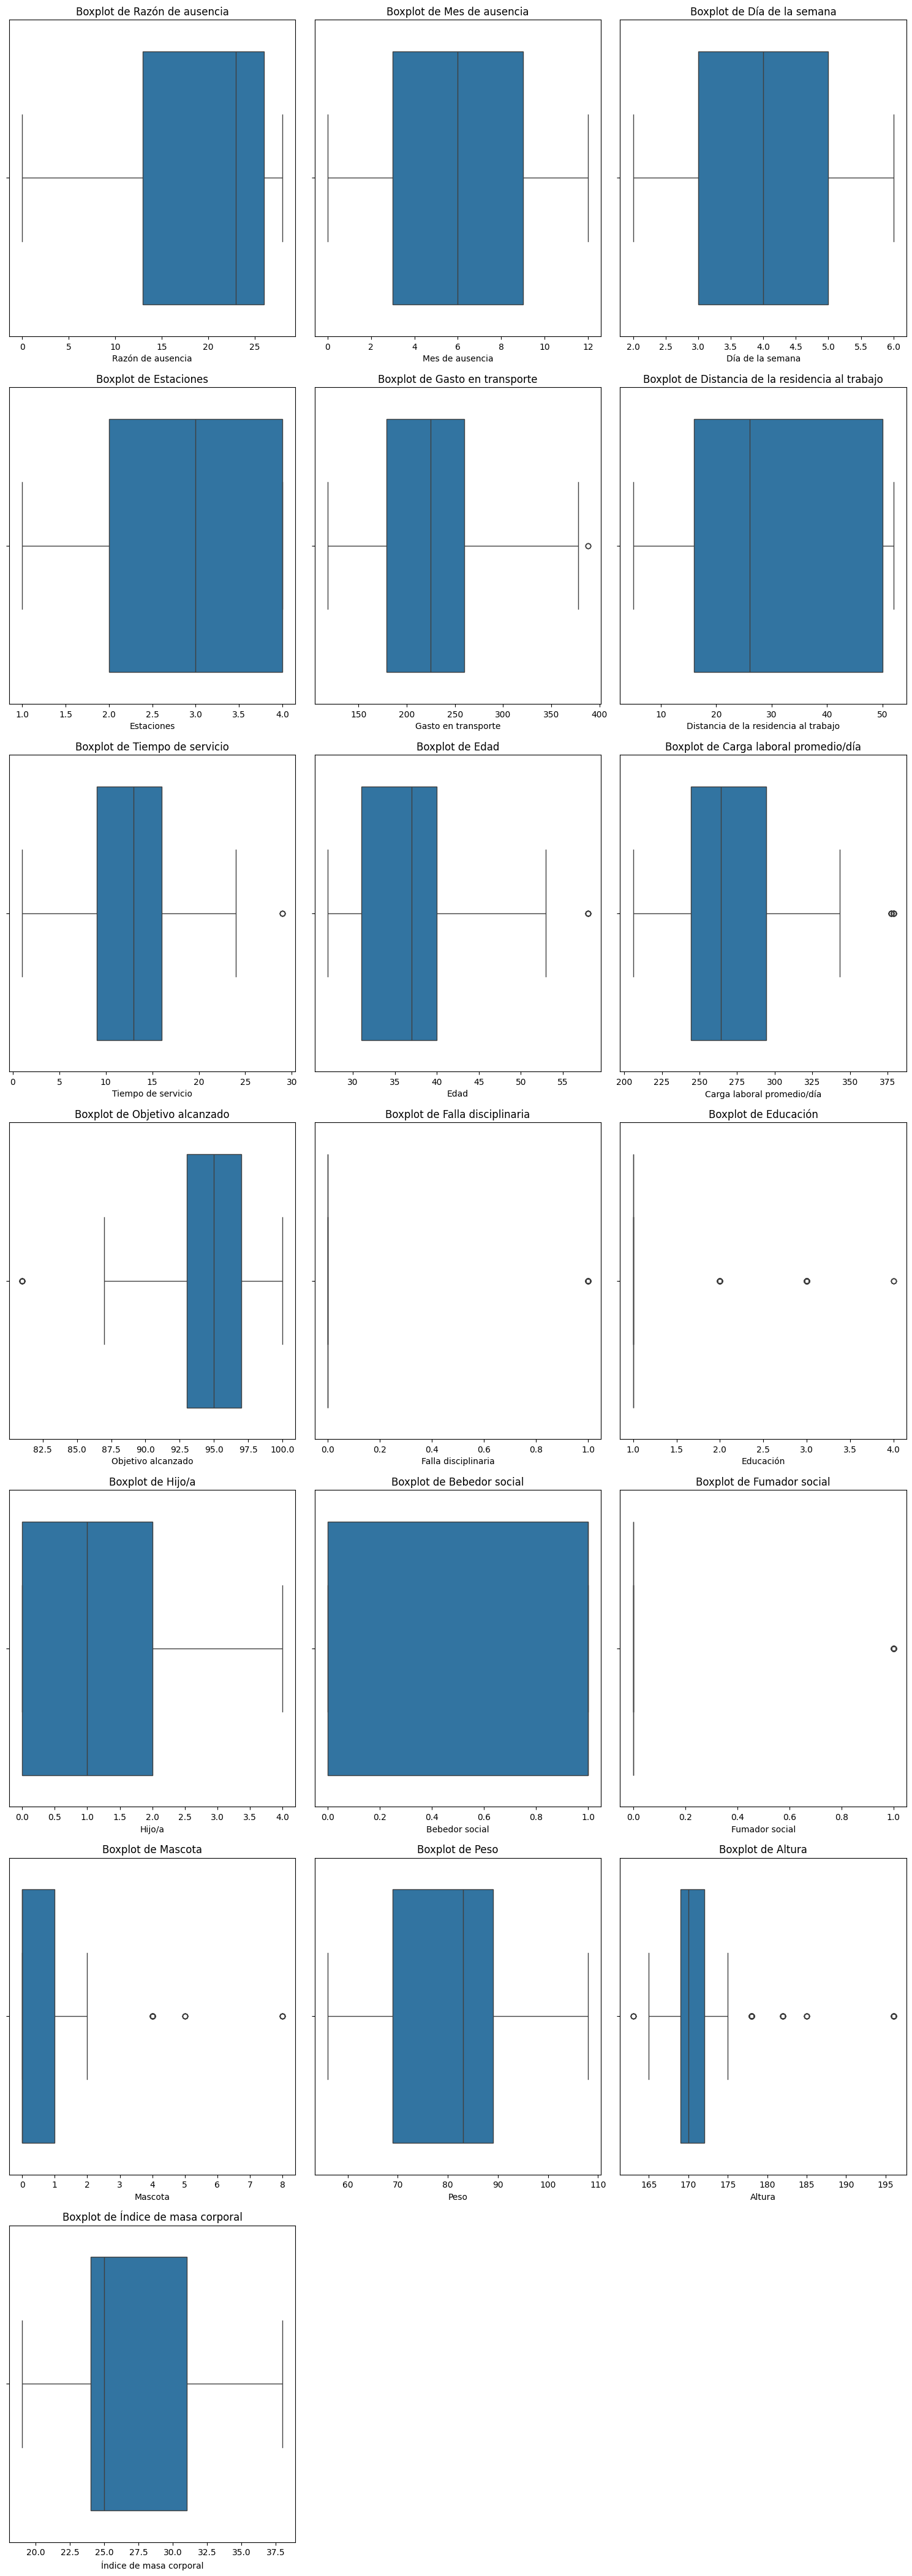

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# N√∫mero de variables a graficar
num_features = len(features)  # Lista con nombres de las variables
num_cols = 3  # N√∫mero de columnas
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgr√°ficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de √≠ndice
axes = axes.flatten()

# Iterar sobre cada variable y graficar su boxplot
for i, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f"Boxplot de {feature}")

# Ocultar subgr√°ficos vac√≠os
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gr√°ficos sobrantes

plt.tight_layout()
plt.show()


En la visualizaci√≥n de los gr√°ficos se pueden observar valores at√≠picos pero que cumple con los parametros informados y estudiados, por lo que no ser√° necesario quitar esos outliers ya que pueden presentar una informaci√≥n valiosa como el hallazgo de nuevos insight.

### 2.3 Gr√°ficos de dispersi√≥n (scatterplots)

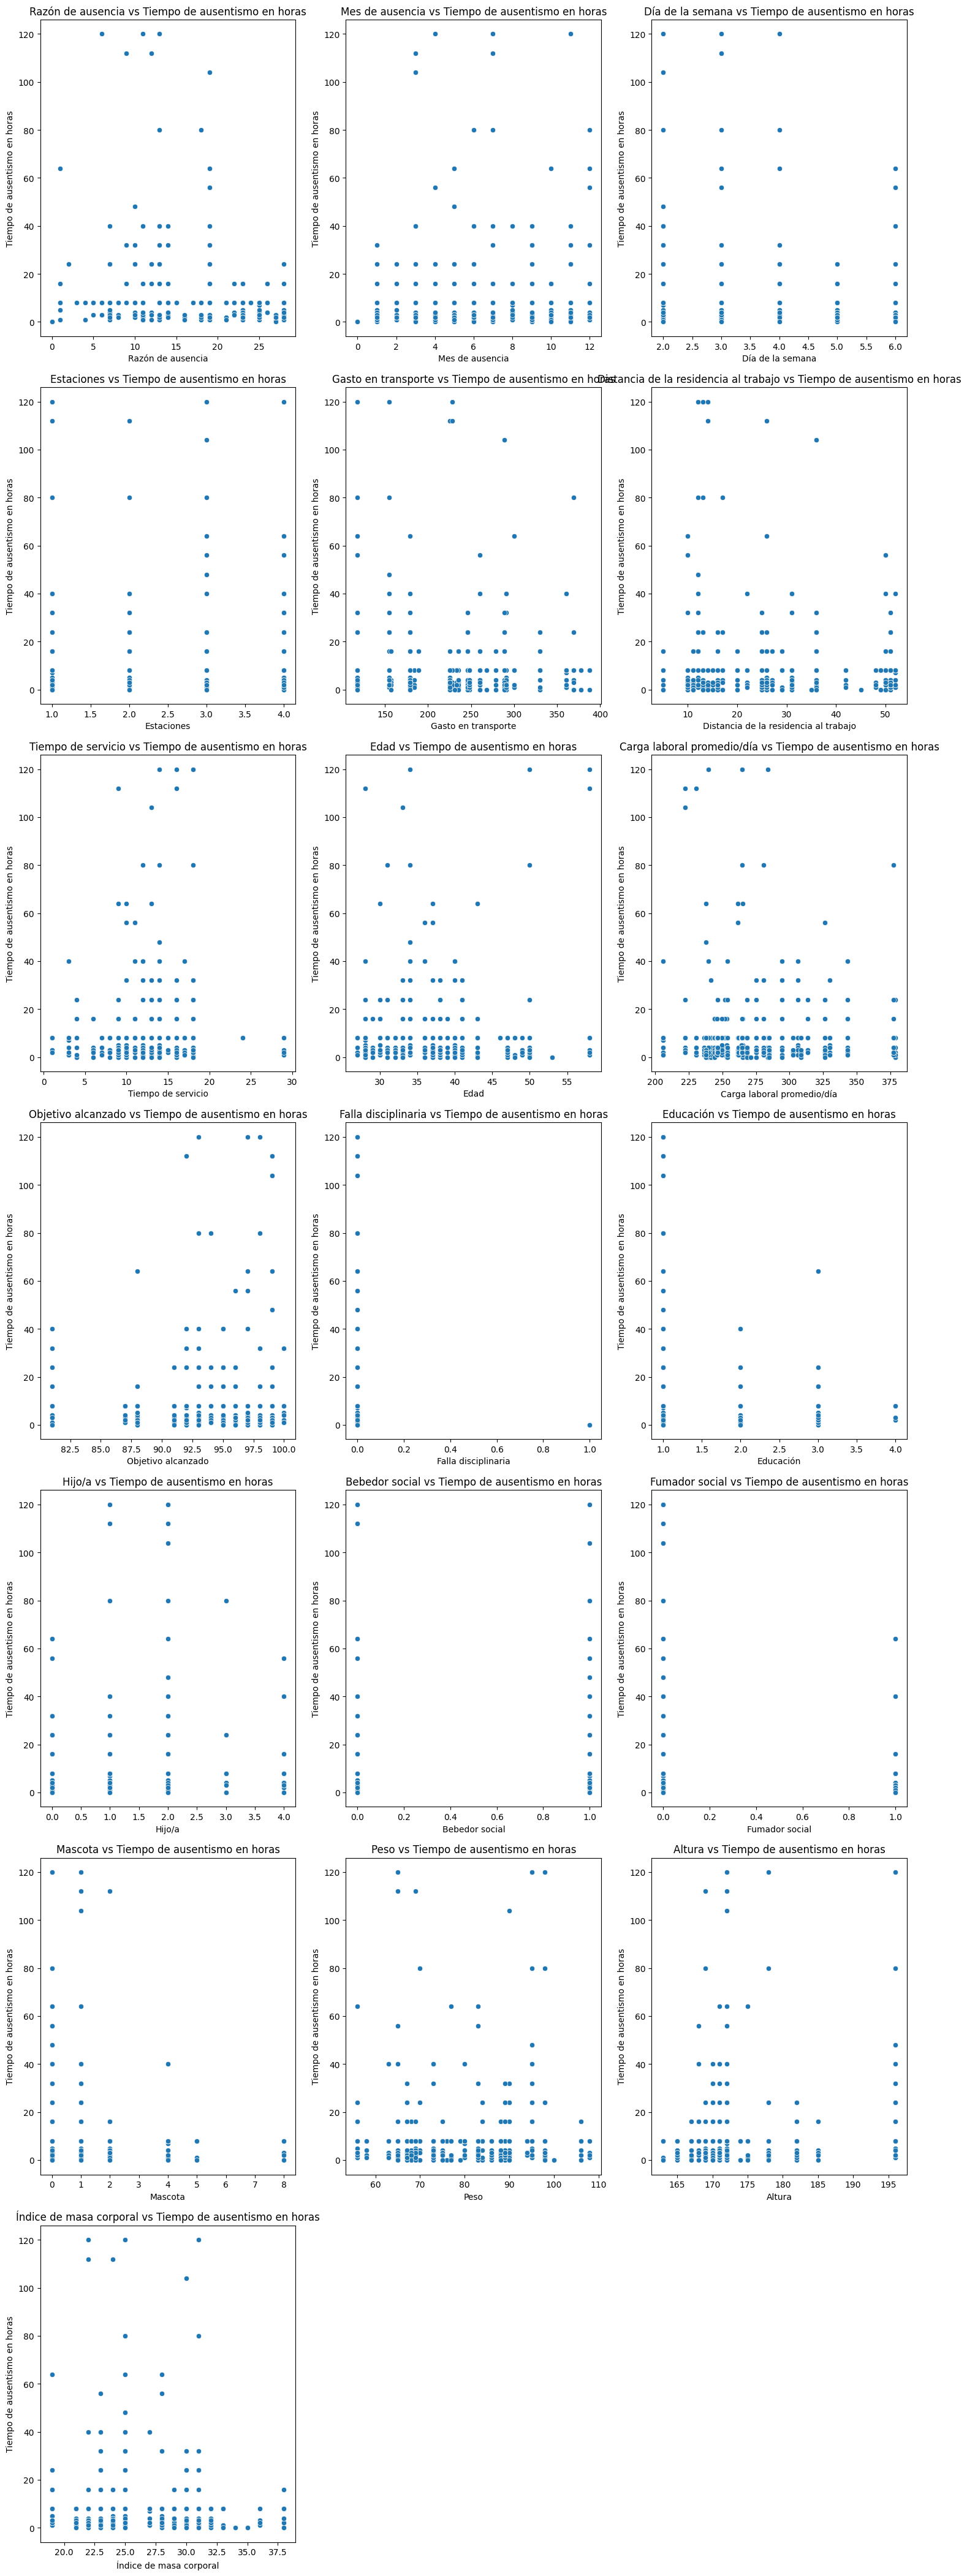

In [8]:
# Contar la cantidad de caracter√≠sticas a graficar
num_features = len(features)  # 19 caracter√≠sticas
num_cols = 3  # N√∫mero de columnas fijo
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgr√°ficos ajustados
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de √≠ndice
axes = axes.flatten()

# Iterar sobre cada feature y graficarla
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}")

# Ocultar subgr√°ficos vac√≠os
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gr√°ficos sobrantes

plt.tight_layout()
plt.show()


## Resoluci√≥n:

***Target = Tiempo de ausentismo en horas***

*   **Raz√≥n ausencia vs Target =** Los casos de enfermedades que se encuentran
entre 10 y 20 suelen tener mas tiempo de ausencia que el resto.

*   **Mes de ausencia vs Target =** Entre los meses Marzo y Diciembre se registar que tienen ausencia de entre 20 a 80 horas.

*   **D√≠a de la semana vs Target =** Los dias lunes, martes y mi√©rcoles suelen tener mas faltas acumulando hasta 120 horas.

*   **Estaciones vs target =** Considerando solo 4 puntos en estaciones, deduzco que se refiere a las estaciones del a√±o y se visualiza que en oto√±o(3) tiempo del Norte, suceden mas horas de ausencia que en las otras estaciones.

*   **Gasto en trasporte vs Target =** los que tienen bajo gasto en transporte sueles tener mas tiempo de ausentismo.

*   **Distancia de la residencia vs Target =** Los que viven a menor distancia de la residencia suelen llegar mas tarde aumentando el ausentismo.

*   **Tiempo de servicio vs Target =** los que tienen entre 8 y 18 a√±os de servicio suelen tener m√°s tiempo en ausentismo.

*   **Edad vs Target =** Los que tienen entre 30 y 38 a√±os de edad suelen tener mas tiempo de ausentismo.

*   **Carga laboral vs Target =** Los que tienen poca carga laboral suelen tener mayor ausentismo.

*   **Objetivo alcanzado vs Target =** Los que cumplen el objetivo entre 92% y 100%, tienen mas ausentismo.

*   **Fallas disciplinarias vs Target =** Los que no tienen fallas disciplinarias tienden a tener mas ausentismo.

*   **Educaci√≥n vs Target =** Los que solo han terminado la secundaria tienen mayor ausencia.

*   **Hijos vs Target =** Los que tienen entre 1 y 2 hijos suelten tener mas ausencia.

*   **Fumador Social vs Target =** El Fumador ligeramente suele tener mas ausencia que uno que no.

*   **Mascotas vs Target =** Los que tienen hasta una mascota suelen tener mas ausencia.

*   **Peso vs Target =** Los que pesan 70 y 100 kilos tiene un aumento en ausencia.

*   **Altura vs Target =** Los que miden entre 168 y 180 tienen mas ausencia, pero se deduce que la estatura media es la mencionada.

*   **Indice de masa corporal vs Target =** Los que tienen entre 21 y 30 de IMC, suelen tener mas ausencia.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cu√°les features descarta. Justifique.
   - Indique si usar√° o no variables categ√≥ricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas num√©ricas y en la misma escala.

## 3.1 Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).

In [9]:
df.isnull().sum()

Id                                       0
Raz√≥n de ausencia                        0
Mes de ausencia                          0
D√≠a de la semana                         0
Estaciones                               0
Gasto en transporte                      0
Distancia de la residencia al trabajo    0
Tiempo de servicio                       0
Edad                                     0
Carga laboral promedio/d√≠a               0
Objetivo alcanzado                       0
Falla disciplinaria                      0
Educaci√≥n                                0
Hijo/a                                   0
Bebedor social                           0
Fumador social                           0
Mascota                                  0
Peso                                     0
Altura                                   0
√çndice de masa corporal                  0
Tiempo de ausentismo en horas            0
dtype: int64

‚öì No hay valores nulos para imputar

## 3.2 Correlaci√≥n de features

Tiempo de ausentismo en horas    1.000000
Altura                           0.144420
Hijo/a                           0.113756
Falla disciplinaria             -0.124248
D√≠a de la semana                -0.124361
Raz√≥n de ausencia               -0.173116
Name: Tiempo de ausentismo en horas, dtype: float64


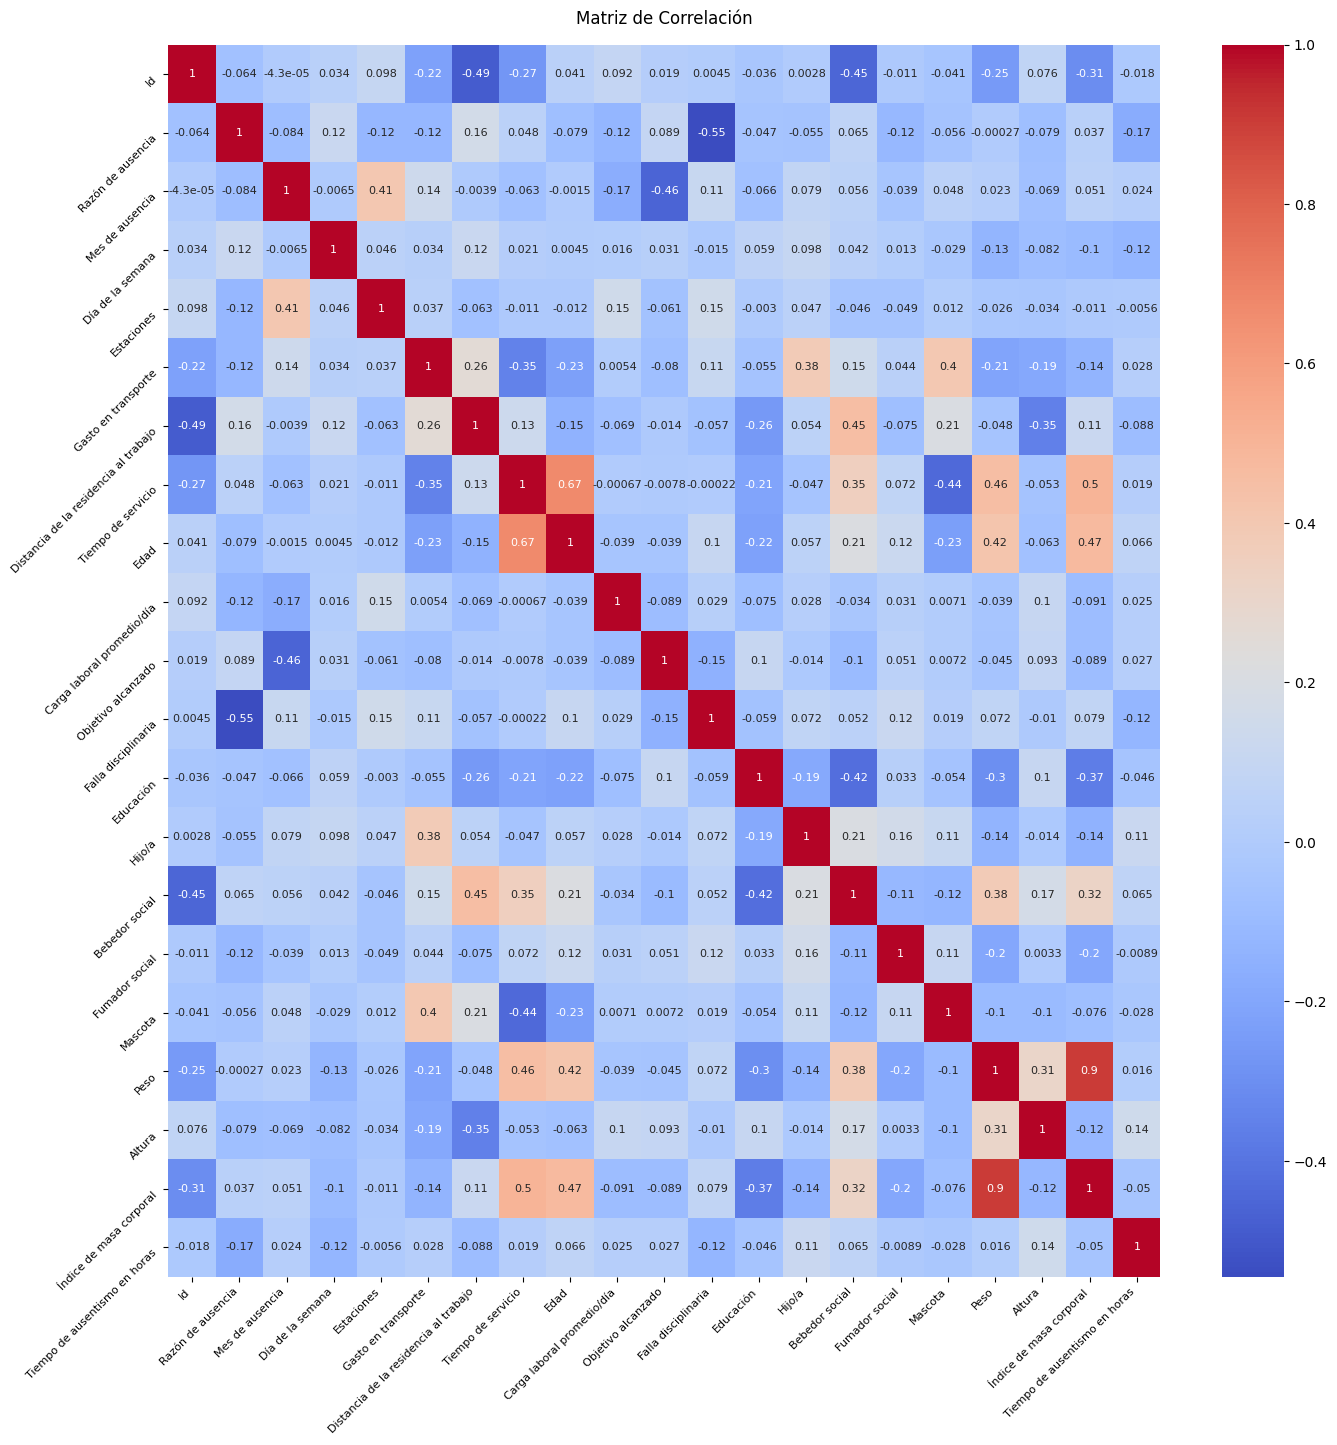

In [10]:
correlation = df.corr()

threshold = 0.1  # Umbral m√≠nimo de correlaci√≥n
selected_corr = correlation[abs(correlation["Tiempo de ausentismo en horas"]) > threshold]["Tiempo de ausentismo en horas"]
print(selected_corr.sort_values(ascending=False))

plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlaci√≥n', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados
plt.show()

Se realiz√≥ una correlaci√≥n para ver la significancia de cada feature y se visualiza que aunque los valores sean muy bajos y muy pocas features tengan mayor correlaci√≥n ya sea positiva o negativa, hay variables que tienen poco peso, pero influeyen en otras mas importantes.

In [11]:
# Eliminaci√≥n de variables innecesarias
df.drop(columns=['Id', 'Falla disciplinaria', 'Bebedor social', 'Fumador social'], inplace=True)

## 3.2 Limpieza: indique cu√°les features descarta. Justifique.

‚úÖ Elimin√© la feature "Id", ya que no tiene sentido mantener un numero identificatorio que no influye en absoluto en el dataset.

‚úÖ Falla disciplinaria, Bebedor social y Fumador social, las elimin√© porque en en la visualizaci√≥n del gr√°fico de dispersi√≥n estas features casi no tienen influencia.

## 3.3 Escalado de features aplizando Z-Score

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Seleccionar las columnas a escalar
features = df
# Aplicar StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Ver las primeras filas escaladas
features_scaled[:1]

array([[ 0.80493838,  0.19676258, -0.64394734, -1.3901746 ,  1.01140838,
         0.42955567,  0.10176977, -0.53286845, -0.81821241,  0.63868581,
        -0.43385741,  0.89372277,  0.19284983,  0.85167289, -0.01904601,
         0.77593223, -0.21951111]])

üëç Normalic√© los datos con Z-score para que los clusters no se vean afectados por rangos muy distintos.




## 4. **Clustering**  
   

En este apartado aplicar√° clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el n√∫mero ideal de cl√∫sters usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

## 4.1.1 Determine el n√∫mero ideal de cl√∫sters usando Silhoutte Score.

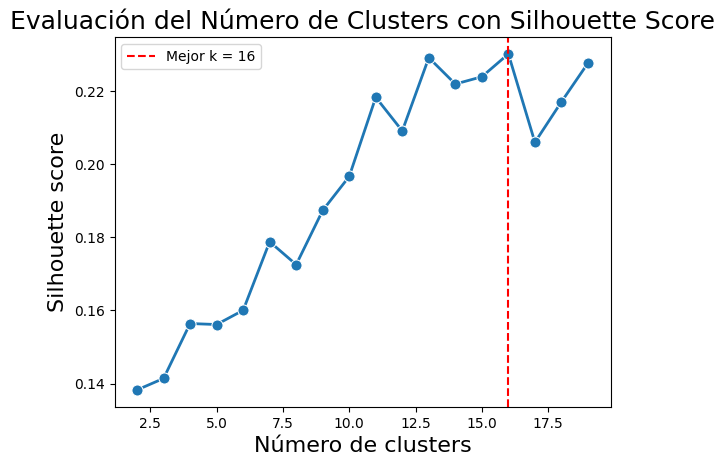

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples
import numpy as np

# Lista para almacenar los valores del Silhouette Score
sil = []

# Definir el rango de valores de k (n√∫mero de clusters) a evaluar
k_values = range(2, 20)

# Iterar sobre diferentes valores de k para calcular el Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=1)  # Se aumenta n_init a 30 repeticiones para mayor estabilidad
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)  # Se calcula el Silhouette Score
    sil.append(score)

# Identificar el mejor n√∫mero de clusters (k con mayor Silhouette Score)
best_k = k_values[np.argmax(sil)]  # Encuentra el √≠ndice del valor m√°ximo y obtiene el mejor k


# Graficar los resultados del Silhouette Score para cada n√∫mero de clusters
sns.lineplot(x=k_values, y=sil, marker='o', linewidth=2, markersize=8, legend=False)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Mejor k = {best_k}')  # L√≠nea roja indicando el mejor k
plt.legend()
plt.ylabel('Silhouette score', fontsize=16)
plt.xlabel('N√∫mero de clusters', fontsize=16)
plt.title("Evaluaci√≥n del N√∫mero de Clusters con Silhouette Score", fontsize=18)
plt.show()

 ‚ö° Silhoutte Score sugiere que la cantidad ideal de cluster sea de 16, debe ser por la alta dimencionalidad ya que los datos aunque estan estandarizados, no tienen una distribuci√≥n normal y son 20 features que se estan analizando, por lo que voy a aplicar PCA para la reducci√≥n de dimencionalidad.

## 4.1.2 Aplique K-means sobre los datos procesados del grupo anterior.

In [15]:
# Aplicar K-Means con el n√∫mero √≥ptimo de clusters
kmeans_final = KMeans(n_clusters=16, n_init=30, random_state=1)
kmeans_final.fit(features_scaled)

# Obtenci√≥n de etiquetas y coordenadas de centroides
labels = kmeans_final.labels_ # Etiquetas de los clusters asignadas a cada punto
centroids = kmeans_final.cluster_centers_ # Coordenadas de los centroides de los grupos

In [16]:
# Evaluaci√≥n del modelo: C√°lculo del puntaje de silueta
silhouette_avg = silhouette_score(features_scaled, labels)
print(f'Puntaje de silueta: {silhouette_avg:.4f}')

Puntaje de silueta: 0.2302


El puntaje de la silueta al aplicar k-means es muy bajo por lo que el modelo no esta sabiendo agrupar correctamente los datos, solo agrupa correctamente el 23% de todos los datos.

### 4.2 An√°lisis intra-cl√∫ster

Para el modelo de K-means con el valor de k (n√∫mero de cl√∫steres) ideal, analice los datos que pertenecen a cada cl√∫sters. ¬øCu√°les son sus caracter√≠sticas / distribuci√≥n? Puede usar gr√°ficas como box-plots

## 4.2.1 distribuci√≥n de observaciones por cluster

## Gr√°fico de barras de los clusters

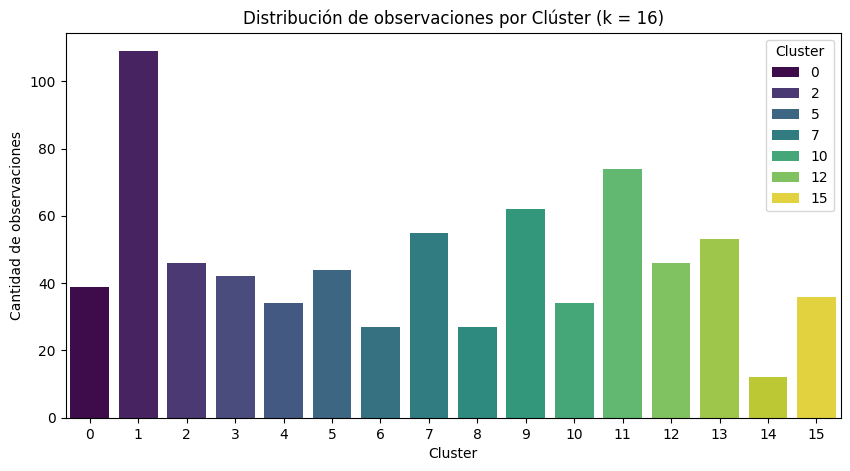

In [17]:
# Agregar a las observaciones originales sus labels correspondientes
features_labels = features.copy()
features_labels["Cluster"] = labels

# Contar n√∫mero de observaciones por cl√∫ster
cluster_counts = features_labels["Cluster"].value_counts().sort_index()

# Visualizar con un gr√°fico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de observaciones")
plt.title(f"Distribuci√≥n de observaciones por Cl√∫ster (k = {len(cluster_counts)})")
plt.show()



- Se creo un gr√°fico de barras para ver la cantidad aproximada de observaciones que hay en cada cluster.

## Gr√°fico Boxplot de los Clusters

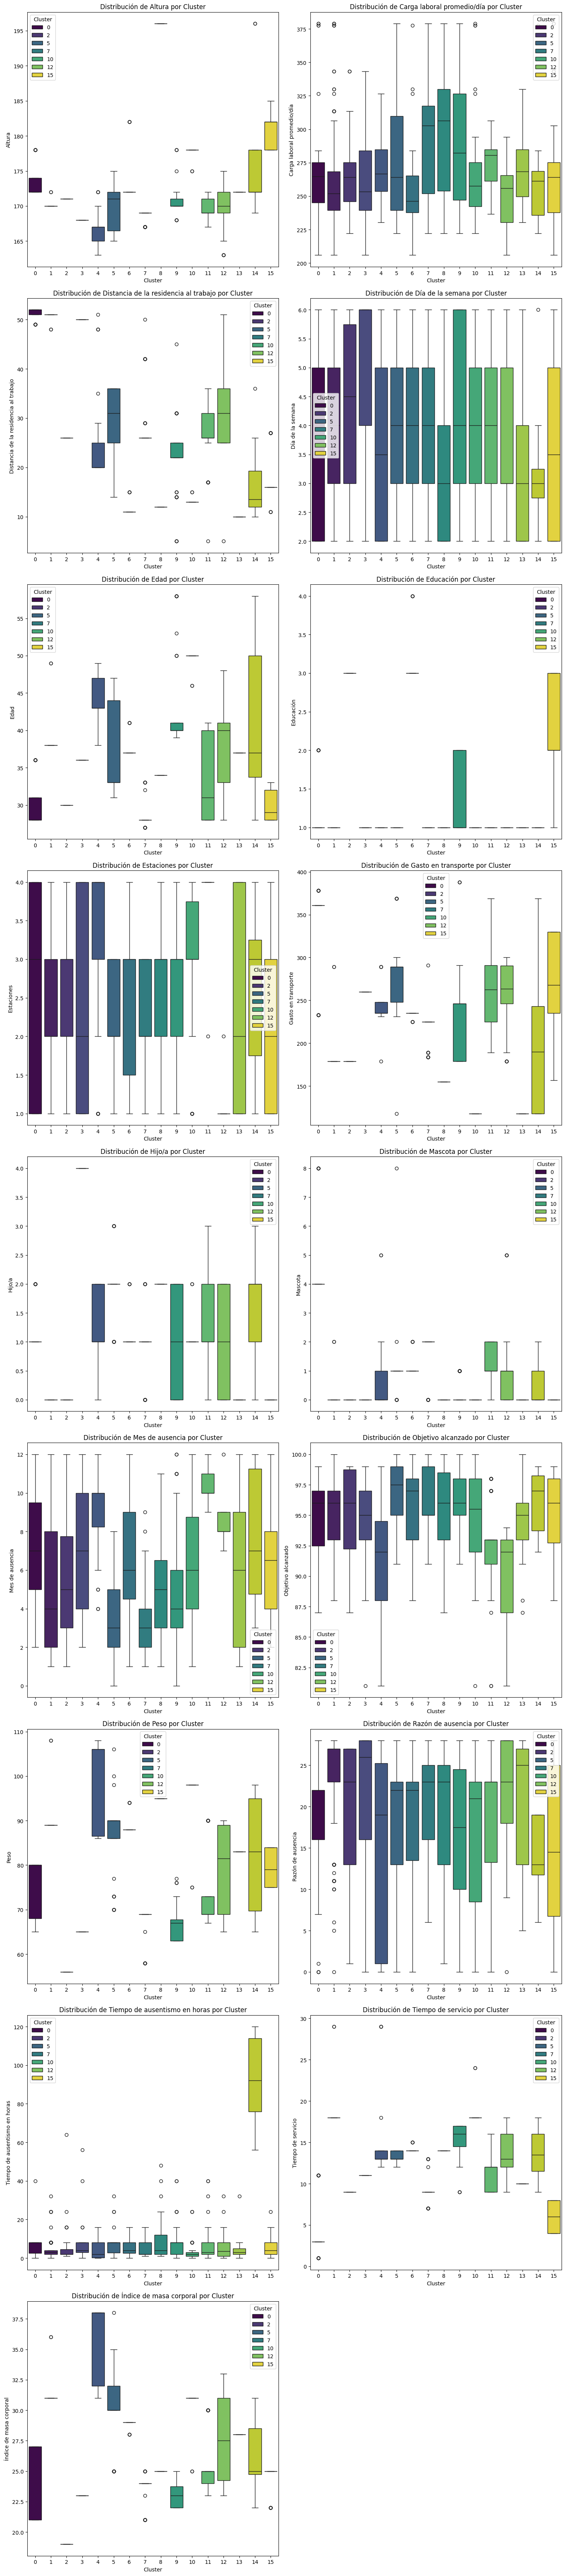

In [18]:
# Obtener todas las columnas excepto 'Cluster'
features_plot = features_labels.columns.difference(["Cluster"])

# Crear boxplots para cada variable dentro de los clusters
plt.figure(figsize=(15, len(features_plot) * 4))  # Ajusta el tama√±o de la figura din√°micamente

for i, feature in enumerate(features_plot):
    plt.subplot(len(features_plot) // 2 + 1, 2, i + 1)
    sns.boxplot(x="Cluster", y=feature, hue="Cluster", data=features_labels, palette="viridis")
    plt.title(f"Distribuci√≥n de {feature} por Cluster")

plt.tight_layout()
plt.show()



 ## ¬øCu√°les son sus caracter√≠sticas / distribuci√≥n?

 - ‚úç Se observa mucha variabilidad en los datos en cada feature.

 - ‚úç Se observa que los valores de cada cluster esta muy dispersa, considerando el tama√±o de las cajas.

 - ‚úç Tiempo de ausentismo en horas se ve que tuviera una distribuci√≥n normal.


## 5- Reducci√≥n de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

In [19]:
!pip install gensim

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 70.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 73.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing instal

In [20]:
from sklearn.decomposition import PCA

## PCA 2D

In [21]:
# Aplicar PCA con un n√∫mero de componentes
pca_full = PCA(n_components=2)
x_pca_full = pca_full.fit_transform(features_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)  # Varianza acumulada

# Imprimir la varianza explicada por cada uno de los componentes principales
for i in range(len(explained_variance)):
    print(f"Varianza explicada por PC{i+1}: {round(explained_variance[i] * 100, 4)}")

# Tambi√©n mostramos el total acumulado
print(f"Varianza total explicada (2D): {round(total_variance[-1] * 100, 4)}")

Varianza explicada por PC1: 18.3601
Varianza explicada por PC2: 12.074
Varianza total explicada (2D): 30.4341


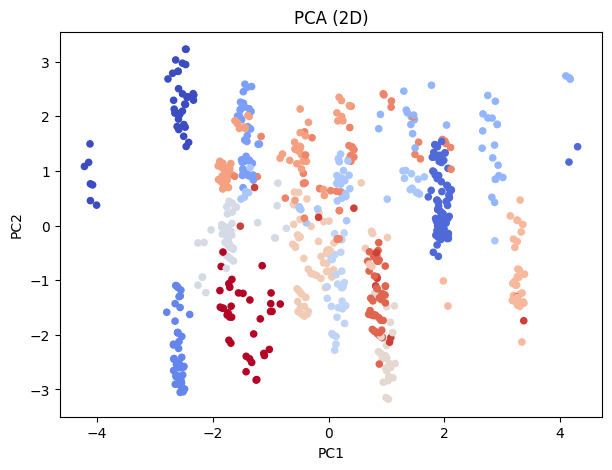

In [22]:
plt.figure(figsize=(7, 5))
plt.scatter(x_pca_full[:, 0], x_pca_full[:, 1], c=labels, cmap='coolwarm', s=20)
plt.title('PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- Se visualiza que solo el 30.4% de toda la informaci√≥n esta representada en estos 2 componentes, no siendo un porcentaje √≥ptimo.

## PCA 3D



In [23]:
# Aplicar PCA con un n√∫mero de componentes
pca_full = PCA(n_components=3)
x_pca = pca_full.fit_transform(features_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)  # Varianza acumulada

# Imprimir la varianza explicada por cada uno de los componentes principales
for i in range(len(explained_variance)):
    print(f"Varianza explicada por PC{i+1}: {round(explained_variance[i] * 100, 4)}")

# Tambi√©n mostramos el total acumulado
print(f"Varianza total explicada (3D): {round(total_variance[-1] * 100, 4)}")

Varianza explicada por PC1: 18.3601
Varianza explicada por PC2: 12.074
Varianza explicada por PC3: 10.1581
Varianza total explicada (3D): 40.5922


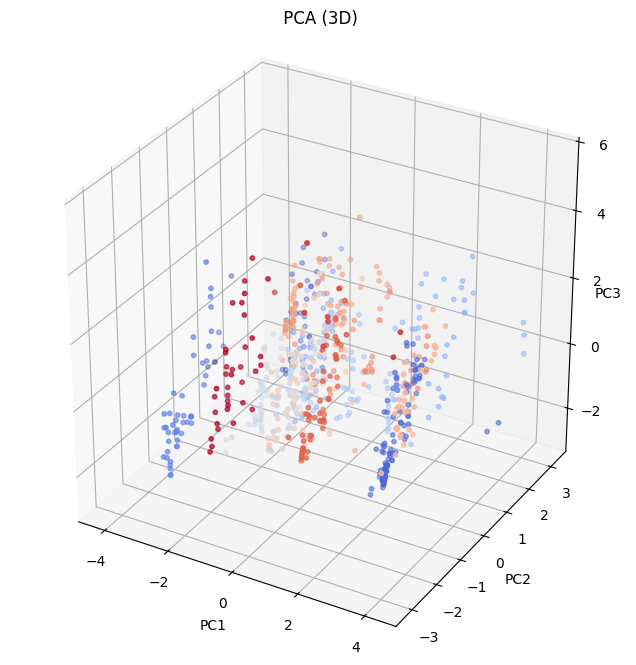

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=labels, cmap='coolwarm', s=10)
ax.set_title(' PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-4)
plt.show()

- Se visualiza que PCA con 3 componentes solo representa el 40.6% de todos los datos, lo que aun sigue siendo bajo el porcentaje.

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y an√°lisis que realiz√≥ para el punto 4) pero con este dataset reducido.

## 5.2.1. Volver a evaluar el n√∫mero optimo de clusters

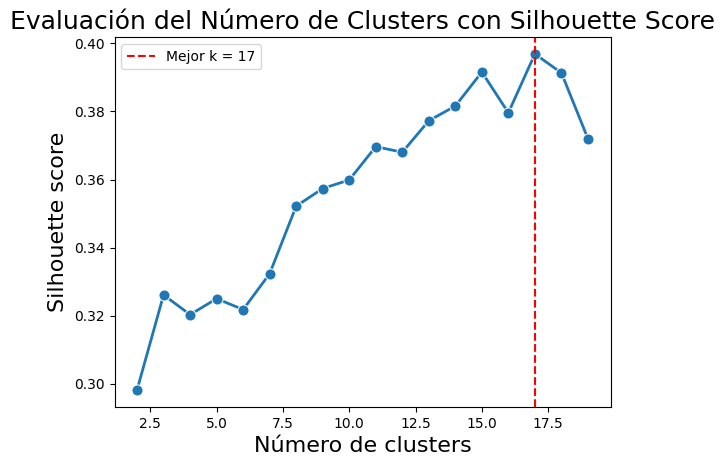

In [25]:
# Lista para almacenar los valores del Silhouette Score
sil = []

# Definir el rango de valores de k (n√∫mero de clusters) a evaluar
k_values = range(2, 20)

# Iterar sobre diferentes valores de k para calcular el Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1)  # Se aumenta n_init a 20 para mayor estabilidad
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_)  # Se calcula el Silhouette Score
    sil.append(score)

# Identificar el mejor n√∫mero de clusters (k con mayor Silhouette Score)
best_k = k_values[np.argmax(sil)]  # Encuentra el √≠ndice del valor m√°ximo y obtiene el mejor k


# Graficar los resultados del Silhouette Score para cada n√∫mero de clusters
sns.lineplot(x=k_values, y=sil, marker='o', linewidth=2, markersize=8, legend=False)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Mejor k = {best_k}')  # L√≠nea roja indicando el mejor k
plt.legend()
plt.ylabel('Silhouette score', fontsize=16)
plt.xlabel('N√∫mero de clusters', fontsize=16)
plt.title("Evaluaci√≥n del N√∫mero de Clusters con Silhouette Score", fontsize=18)
plt.show()

Esta vez Silhoutte score evalu√≥ el numero de clusters en 17 como mas √≥ptimo.



## 5.2.2. Aplicaci√≥n de  k-means

Puntaje de silueta: 0.3969


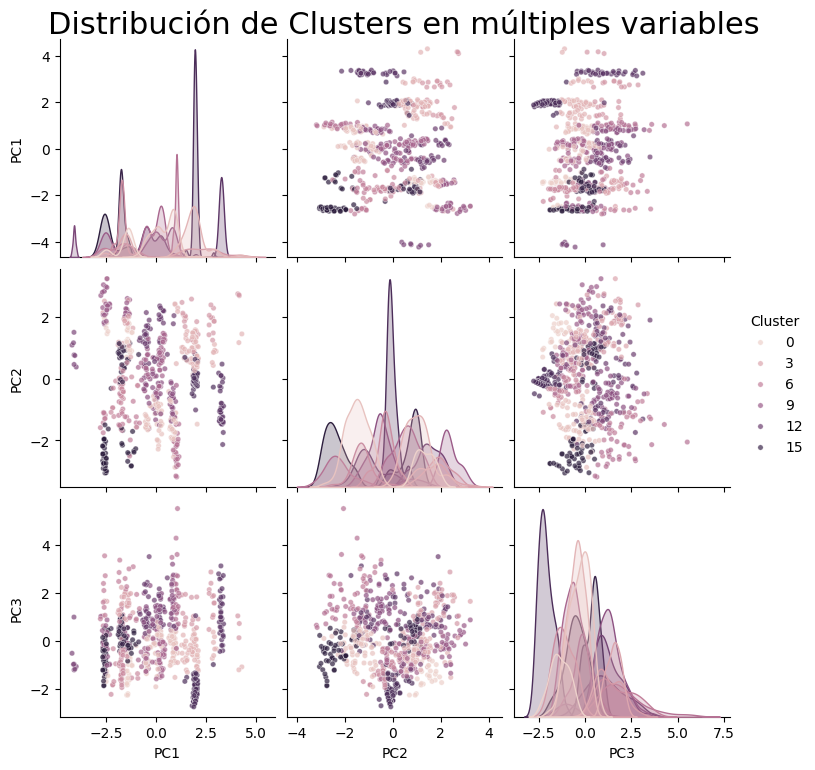

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-Means con el n√∫mero √≥ptimo de clusters
kmeans_final = KMeans(n_clusters=17, n_init=20, random_state=1)
kmeans_final.fit(x_pca)

# Obtenci√≥n de etiquetas y coordenadas de centroides
labels = kmeans_final.labels_ # Etiquetas de los clusters asignadas a cada punto
centroids = kmeans_final.cluster_centers_ # Coordenadas de los centroides de los grupos

# Evaluar el puntaje de silueta
silhouette_avg = silhouette_score(x_pca, labels)
print(f'Puntaje de silueta: {silhouette_avg:.4f}')

# Convertir a DataFrame y agregar la columna de clusters
x_pca_full = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])  # Asegurar que es un DataFrame
x_pca_full["Cluster"] = labels  # Agregar la columna de clusters antes de graficar

# Visualizar con pairplot diferenciando clusters
sns.pairplot(x_pca_full, hue="Cluster", height=2.5, plot_kws={'s': 15, 'alpha': 0.7})
plt.suptitle("Distribuci√≥n de Clusters en m√∫ltiples variables", fontsize=22, y=1.02)
plt.show()


El Puntaje de silueta: 0.3969 subi√≥ considerablemente despues de aplicar PCA y posteriormente K-means, por lo que el modelo representa el 40% de todos lo datos, no siendo un modelo √≥ptimo.

## 6- Conclusiones

* observamos los puntajes de la silueta antes (0.2302) y despues (0.3969) de aplicar PCA y hubo un aumento importante en el puntaje, dejando en evidencia que aplicar K-means a este conjunto de datos cumple medianamente con la divisi√≥n por cluster pero a√∫n no logra dividir bien los grupos.

* ¬ø La reducci√≥n de dimensionalidad mejor√≥ o empeor√≥ el desempe√±o del clustering?
 - La reducci√≥n de dimensionalidad mejor√≥ significativamente el modelo, el modelo solo pod√≠a captar el 20% sin PCA y al aplicarle reducci√≥n de dimendionalidad pudo captar el 40% de los datos, lo que tuvo muy bueno resultados en su implementacion.

* El desempe√±o de K-means, sigue estando por debajo del 50% de un modelo √≥ptimo, por lo que se podr√≠a probar con otro modelo de clustering para ver su rendimiento.

* Al ver silhouette score en la primera parte del modelo antes de aplicar PCA, encontraba que la cantidad √≥ptima de clusters era 16 y despu√©s de aplicar PCA, silhouette score encontraba como 18 clusters el n√∫mero √≥ptimo



### Conclusi√≥n final

Al ver la variabilidad de los datos y la media de muchos feature estaba en los extremos las cajas de boxplot viendo la asimetr√≠a en los datos que pudieron estar sesgados.

Esto pudo haber causado que K-means nos haya logrado crear lo cluster correctamente o que se hayan superpuesto los centroides.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## DBSCAN en dataset completo

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Aplicar StandardScaler
scaler = StandardScaler()
features_scal = scaler.fit_transform(features_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta estos valores seg√∫n tu dataset
labels_dbscan = dbscan.fit_predict(features_scal)

# Agregar etiquetas al dataframe
df["Cluster_DBSCAN"] = labels_dbscan

# Ver primeros registros con cl√∫ster asignado
df.sample(5)


Raz√≥n de ausencia  Mes de ausencia  D√≠a de la semana  Estaciones  \
310                 10               10                 2           4   
75                  14               10                 3           4   
712                 19                6                 6           3   
563                 26               12                 6           4   
331                 12               11                 6           4   

     Gasto en transporte  Distancia de la residencia al trabajo  \
310                  361                                     52   
75                   291                                     31   
712                  233                                     51   
563                  235                                     20   
331                  291                                     31   

     Tiempo de servicio  Edad  Carga laboral promedio/d√≠a  Objetivo alcanzado  \
310                   3    28                     265.017                  88   
75                   12    40                     253.465                  93   
712                   1    31                     275.089                  96   
563                  13    43                     280.549                  98   
331                  12    40                     284.031                  97   

     Educaci√≥n  Hijo/a  Mascota  Peso  Altura  √çndice de masa corporal  \
310          1       1        4    80     172                       27   
75           1       1        1    73     171                       25   
712          2       1        8    68     178                       21   
563          1       1        0   106     167                       38   
331          1       1        1    73     171                       25   

     Tiempo de ausentismo en horas  Cluster_DBSCAN  
310                              8              -1  
75                               8              -1  
712                              8              -1  
563                              8              -1  
331                              4              -1

In [28]:
# Contar cu√°ntos registros tienen -1 en "Cluster_DBSCAN"
ruido_total = (df["Cluster_DBSCAN"] == -1).sum()

print(f"Total de puntos considerados ruido (-1): {ruido_total}")


Total de puntos considerados ruido (-1): 725


In [29]:
# Contar la cantidad de clusters (excluyendo el ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"N√∫mero de cl√∫steres encontrados: {num_clusters}")

N√∫mero de cl√∫steres encontrados: 17


Se ve que hay 725 observaciones que DBSCAN los considero ruido de 740 datos totales del dataset, por lo que DBSCAN no funciona bien en este conjunto de datos.

## DBSCAN en Dataset Reducido

In [30]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x_pca)

# Agregar etiquetas al dataframe
df["DBSCAN"] = labels_dbscan

# Ver primeros registros con cl√∫ster asignado
df.sample(5)


Raz√≥n de ausencia  Mes de ausencia  D√≠a de la semana  Estaciones  \
288                 13                9                 2           4   
502                 23                9                 2           1   
83                  21               11                 5           4   
16                  23                7                 6           1   
564                 18               12                 2           4   

     Gasto en transporte  Distancia de la residencia al trabajo  \
288                  179                                     51   
502                  179                                     51   
83                   179                                     22   
16                   179                                     51   
564                  233                                     51   

     Tiempo de servicio  Edad  Carga laboral promedio/d√≠a  Objetivo alcanzado  \
288                  18    38                     294.217                  81   
502                  18    38                     261.756                  87   
83                   17    40                     306.345                  93   
16                   18    38                     239.554                  97   
564                   1    31                     280.549                  98   

     Educaci√≥n  Hijo/a  Mascota  Peso  Altura  √çndice de masa corporal  \
288          1       0        0    89     170                       31   
502          1       0        0    89     170                       31   
83           2       2        0    63     170                       22   
16           1       0        0    89     170                       31   
564          2       1        8    68     178                       21   

     Tiempo de ausentismo en horas  Cluster_DBSCAN  DBSCAN  
288                              8              -1      -1  
502                              4              -1       2  
83                               8              -1      -1  
16                               2              -1       2  
564                              8              -1      -1

In [31]:
# Contar cu√°ntos registros tienen -1 en "Cluster_DBSCAN"
ruido_total = (df["DBSCAN"] == -1).sum()

print(f"Total de puntos considerados ruido (-1): {ruido_total}")

Total de puntos considerados ruido (-1): 139


In [32]:
# Contar la cantidad de clusters (excluyendo el ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"N√∫mero de cl√∫steres encontrados: {num_clusters}")

N√∫mero de cl√∫steres encontrados: 17


Se ve que hay 139 observaciones que DBSCAN los considero ruido de 740 datos totales del dataset, por lo que DBSCAN andubo mejor con con los datos reducidos que con el dataset completo

## Conclusi√≥n:

vemos que al aplicar DBSCAN al conjunto de datos completo DBSCAN considero casi la totalidad de los datos como ruido a diferencia de de haber aplicado DBSCAN al dataset reducido que solo considero 139 observaciones como ruido, tgenerando asi 17 cluster que DBSCAN pudo encontrar en el set de datos. dejando como √≥ptimo el modelo de DBSCAN aplicado a los datos reducidos.

Se podria seguir analizando los cluster para ver la cantidad de observaciones que tiene cada uno y que feature predomina en cada uno para ver si se encuentran nuevas variables o patrones ocultos.

## 7.2 An√°lisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¬ø los outliers forman un cl√∫ster propio? ¬øPCA / t-SNE preserva las anomal√≠as?

# Referencias

Mencione los recursos utilizados